In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv'
penguins = pd.read_csv(url)

# Function to add vertical lines and rectangles for mean, median, and various ranges
def add_lines_and_rects(fig, data, mean, median, std, q1, q3, min_val, max_val):
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', width=2, dash='dash'), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', width=2, dash='dash'), annotation_text="Median", annotation_position="top right")
    
    # Add rectangles for range, IQR, and 2 std dev
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="red", opacity=0.2, annotation_text="Range", annotation_position="bottom left")
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="yellow", opacity=0.3, annotation_text="IQR", annotation_position="bottom right")
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, line_width=0, fillcolor="purple", opacity=0.1, annotation_text="2 Std Dev", annotation_position="bottom center")

# Plot histograms for each species and add mean, median, range, IQR, and 2 std dev
species_list = penguins['species'].unique()

for species in species_list:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_val = species_data.min()
    max_val = species_data.max()
    
    # Create the histogram
    fig = px.histogram(species_data, x=species_data, nbins=30, title=f'Flipper Length for {species}')
    
    # Add lines and rectangles for statistics
    add_lines_and_rects(fig, species_data, mean, median, std, q1, q3, min_val, max_val)
    
    # Show the plot
    fig.show()


ValueError: Invalid annotation position bottom center

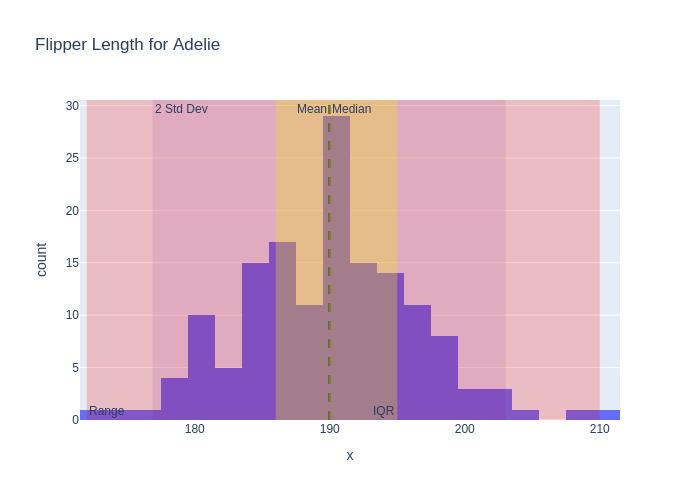

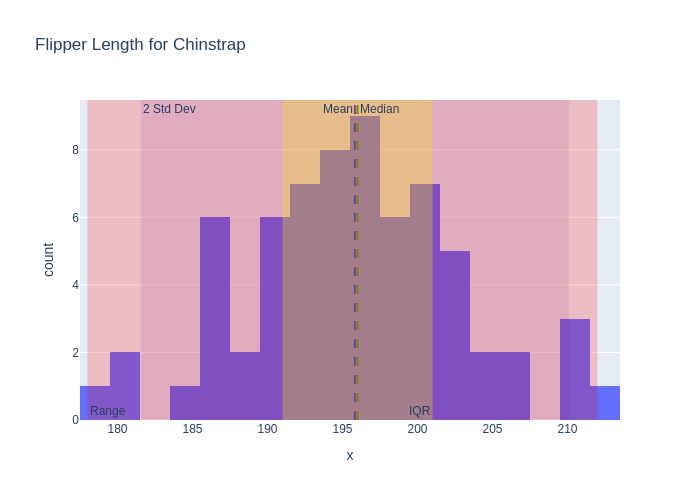

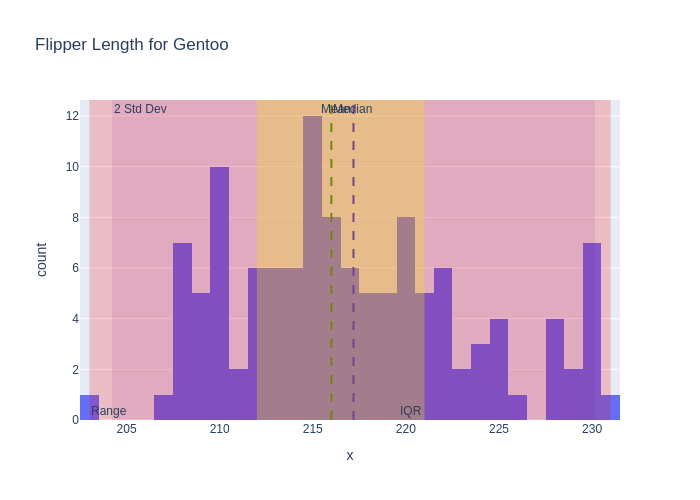

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv'
penguins = pd.read_csv(url)

# Function to add vertical lines and rectangles for mean, median, and various ranges
def add_lines_and_rects(fig, mean, median, std, q1, q3, min_val, max_val):
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', width=2, dash='dash'), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', width=2, dash='dash'), annotation_text="Median", annotation_position="top right")
    
    # Add rectangles for range, IQR, and 2 std dev
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="red", opacity=0.2, annotation_text="Range", annotation_position="bottom left")
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="yellow", opacity=0.3, annotation_text="IQR", annotation_position="bottom right")
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, line_width=0, fillcolor="purple", opacity=0.1, annotation_text="2 Std Dev", annotation_position="top left")

# Plot histograms for each species and add mean, median, range, IQR, and 2 std dev
species_list = penguins['species'].unique()

for species in species_list:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_val = species_data.min()
    max_val = species_data.max()
    
    # Create the histogram
    fig = px.histogram(species_data, x=species_data, nbins=30, title=f'Flipper Length for {species}')
    
    # Add lines and rectangles for statistics
    add_lines_and_rects(fig, mean, median, std, q1, q3, min_val, max_val)
    
    # Show the plot
    fig.show(renderer="png")


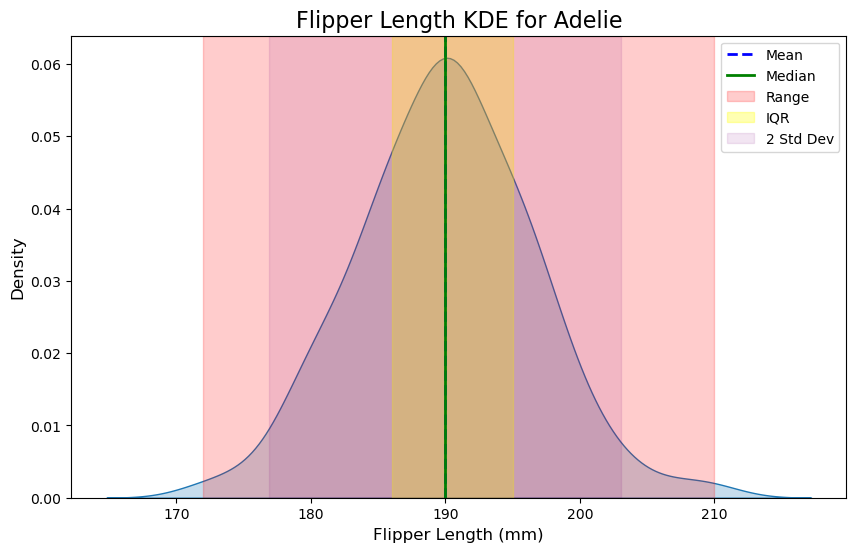

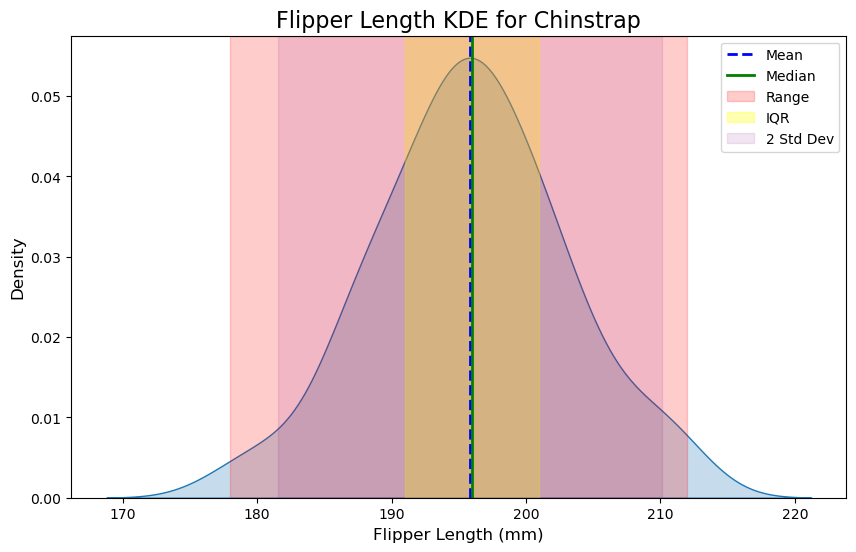

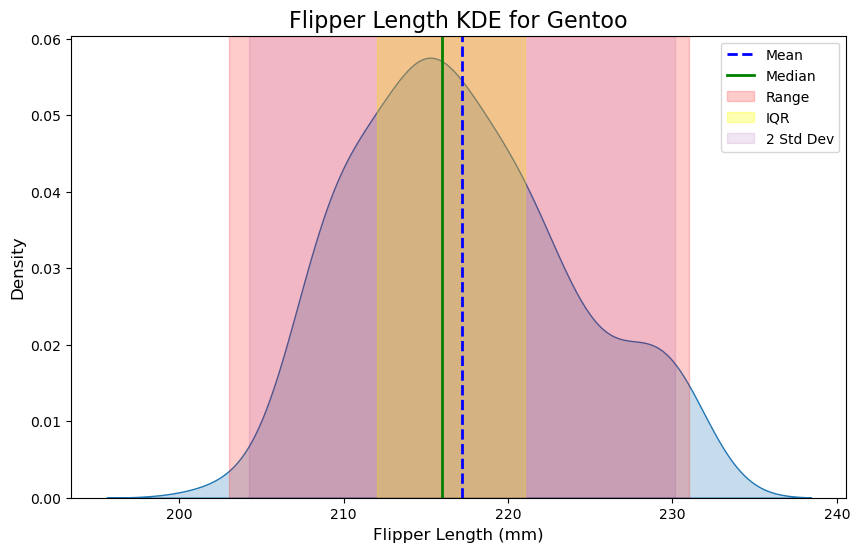

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv'
penguins = pd.read_csv(url)

# Function to add lines and shaded areas for mean, median, and various ranges
def add_lines_and_rects(ax, mean, median, std, q1, q3, min_val, max_val):
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(median, color='green', linestyle='-', linewidth=2, label='Median')
    
    # Shade areas for the range, IQR, and 2 standard deviations from the mean
    ax.axvspan(min_val, max_val, color='red', alpha=0.2, label='Range')
    ax.axvspan(q1, q3, color='yellow', alpha=0.3, label='IQR')
    ax.axvspan(mean - 2 * std, mean + 2 * std, color='purple', alpha=0.1, label='2 Std Dev')

# Plot KDE for each species and add lines for mean, median, range, IQR, and 2 std dev
species_list = penguins['species'].unique()

for species in species_list:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    min_val = species_data.min()
    max_val = species_data.max()
    
    # Create KDE plot
    plt.figure(figsize=(10, 6))
    ax = sns.kdeplot(species_data, fill=True)
    
    # Add lines and shaded areas for statistics
    add_lines_and_rects(ax, mean, median, std, q1, q3, min_val, max_val)
    
    # Add title and labels
    plt.title(f'Flipper Length KDE for {species}', fontsize=16)
    plt.xlabel('Flipper Length (mm)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    
    # Show the legend
    plt.legend()
    
    # Show the plot
    plt.savefig(f'flipper_length_kde_{species}.png', dpi=300)


a box plot has a box that encompasses the data within 1 quartile of the median. A histogram shows the frequency of each value of the data as bars.  A kde plot is like a histogram but instead of a bars, there is a continuous line that represents the distributions.

My preference are histogram plots, since they let you quickly see the distribution, they can let you see sample sizes, the resolution of data can be easily changed by changing bin size and are good for large datasets, 

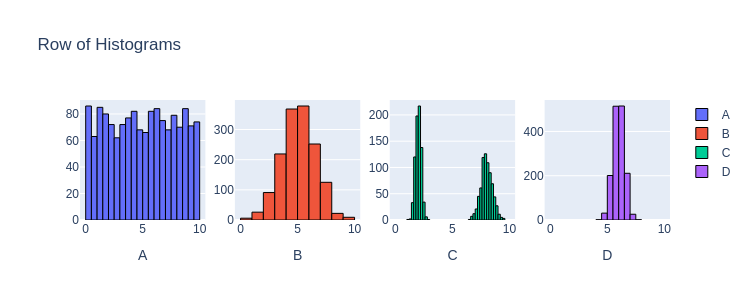

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

A and C both have similar variances and means.
B and C have similar means but much different variances.
B and D have similar variance but different means
C and D have different means and variances

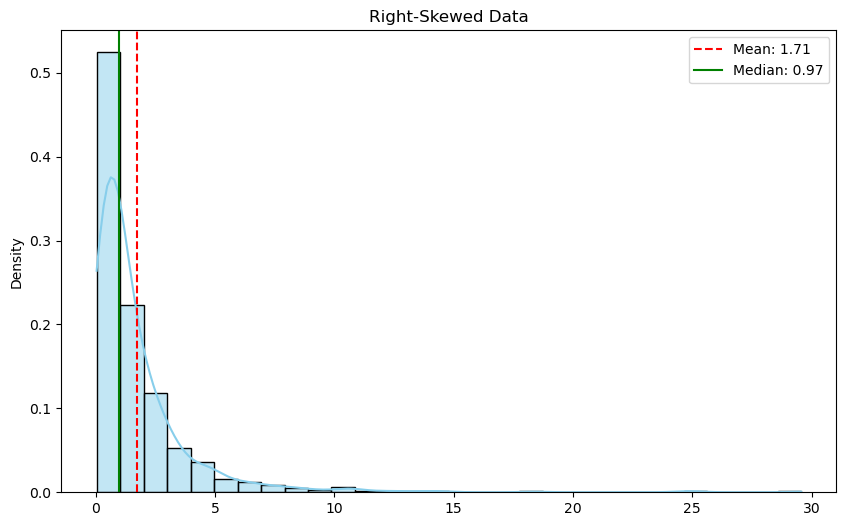

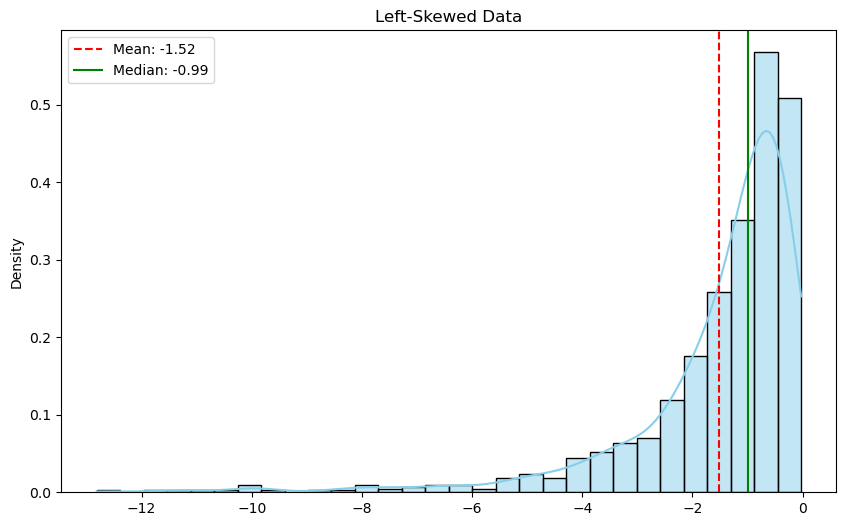

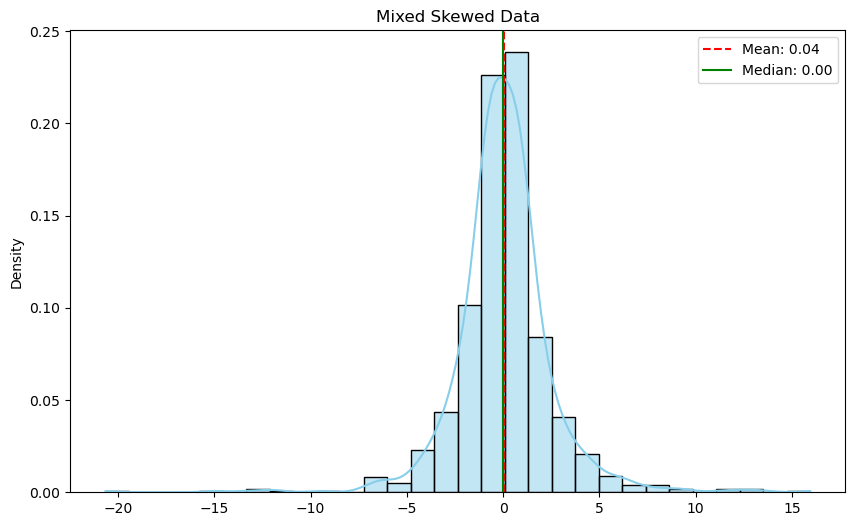

In [18]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate right-skewed data
def generate_right_skewed_data(size=1000):
    return np.random.lognormal(mean=0, sigma=1, size=size)

# Function to generate left-skewed data
def generate_left_skewed_data(size=1000):
    return -np.random.lognormal(mean=0, sigma=1, size=size)

# Function to calculate mean and median
def calculate_mean_median(data):
    mean = np.mean(data)
    median = np.median(data)
    return mean, median

# Function to visualize data and calculate statistics
def visualize_data(data, title):
    mean, median = calculate_mean_median(data)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, color='skyblue', stat='density', bins=30)
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    plt.title(title)
    plt.legend()
    plt.show()

# Generate and visualize right-skewed data
right_skewed_data = generate_right_skewed_data()
visualize_data(right_skewed_data, "Right-Skewed Data")

# Generate and visualize left-skewed data
left_skewed_data = generate_left_skewed_data()
visualize_data(left_skewed_data, "Left-Skewed Data")

# Function to generate mixed skewed data
def generate_mixed_skewed_data(size=1000, skewness_factor=0.5):
    return np.concatenate([
        np.random.lognormal(mean=0, sigma=1, size=int(size * skewness_factor)), 
        -np.random.lognormal(mean=0, sigma=1, size=int(size * (1 - skewness_factor)))
    ])

# Generate and visualize mixed skewed data
mixed_skewed_data = generate_mixed_skewed_data()
visualize_data(mixed_skewed_data, "Mixed Skewed Data")



The mean is the average value of a dataset. The median is the middle value of a dataset when you arrange the values least to greatest. When mean > median, the dataset is right skewed, and if median > mean, it is left skewed.

In [15]:
# Maybe something like this? Feel free to use this one 
# if it strikes your fancy after look around a bit
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


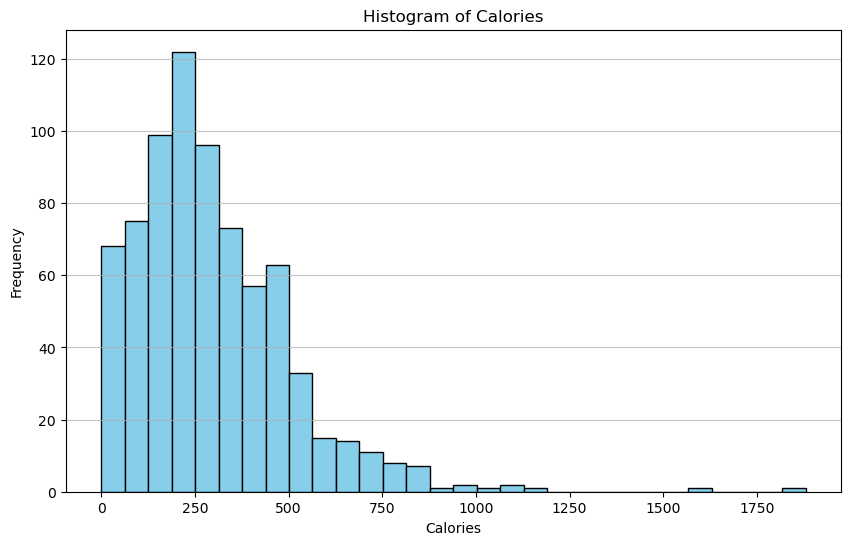

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
# Create a histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


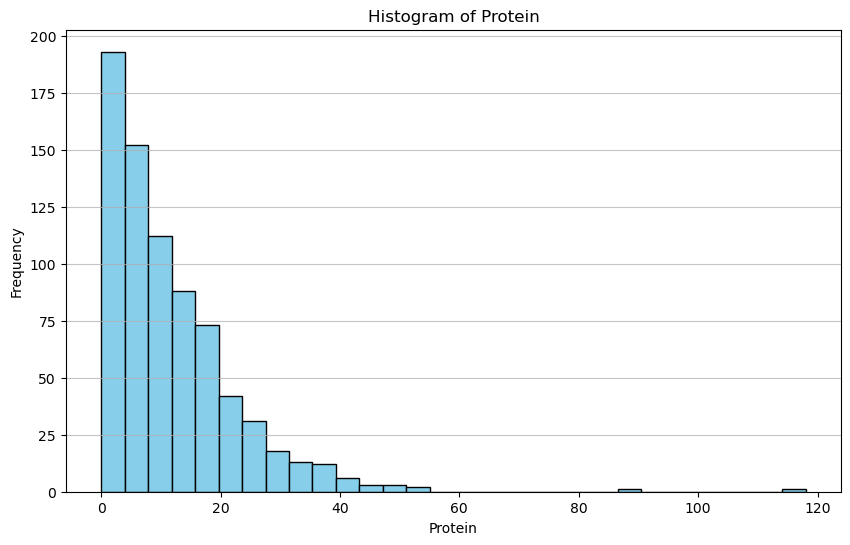

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
# Create a histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['protein (g)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Protein')
plt.xlabel('Protein')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In this conversation, we discussed three types of plots—Box Plots, Histograms, and KDE (Kernel Density Estimate) Plots—and compared their pros and cons:

Box Plots provide a compact summary of data using key statistics like the median, quartiles, and outliers but don't show the exact distribution shape.
Histograms visualize the frequency of data points within bins, offering an intuitive and straightforward way to understand the distribution but are sensitive to bin width.
KDE Plots provide a smoothed, continuous estimate of the data distribution, making it easier to see subtle patterns, though they require careful bandwidth selection and may be harder to interpret for some users.
We then focused on a detailed comparison between Histograms and KDE Plots, covering aspects such as shape, parameter dependency, interpretation, handling of data, and suitability for comparisons. Histograms are more intuitive for showing frequencies, while KDE Plots provide smoother, more flexible visualizations for continuous data.

Finally, I provided guidance on when to use each plot type based on the nature of the data and the analysis goals.

https://chatgpt.com/share/66f611a4-7100-8013-a5ce-40daea13589e